This notebood is use to conduct the EDA for the predicting age task and examining the result of the model.

# EDA

In [10]:
import pandas as pd
import numpy as np
import os

In [11]:
df = pd.read_csv('../data/meta_train.csv')

In [13]:
# try to print the unique values of the age column
df['age'].unique()

array([45, 50, 55, 60, 65, 68, 70, 72, 47, 77, 67, 73, 75, 80, 62, 66, 57,
       82], dtype=int64)

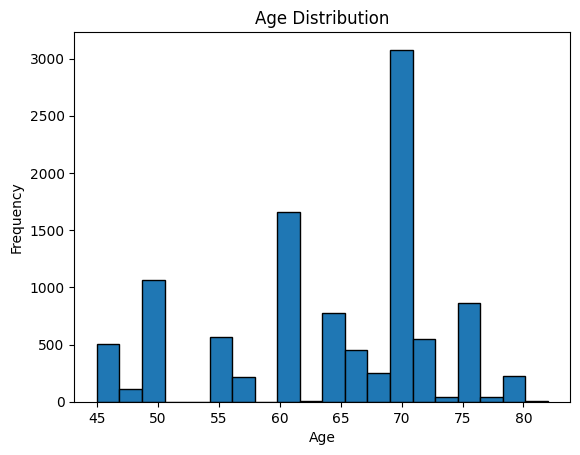

In [16]:
# plot the age distribution of the dataset
import matplotlib.pyplot as plt
plt.hist(df['age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

In [15]:
df.describe()

,age
count,10407.000000
mean,64.043624
std,8.958830
min,45.000000
25%,60.000000
50%,67.000000
75%,70.000000
max,82.000000


# Examine the prediction result

In [4]:
df = pd.read_csv('../data/prediction_submission.csv')

In [5]:
df.describe()

,label,variety,age
count,0.0,0.0,3469.000000
mean,NaN,NaN,64.101658
std,NaN,NaN,8.727343
min,NaN,NaN,40.610000
25%,NaN,NaN,58.780000
50%,NaN,NaN,67.000000
75%,NaN,NaN,70.530000
max,NaN,NaN,83.240000


Text(0, 0.5, 'Frequency')

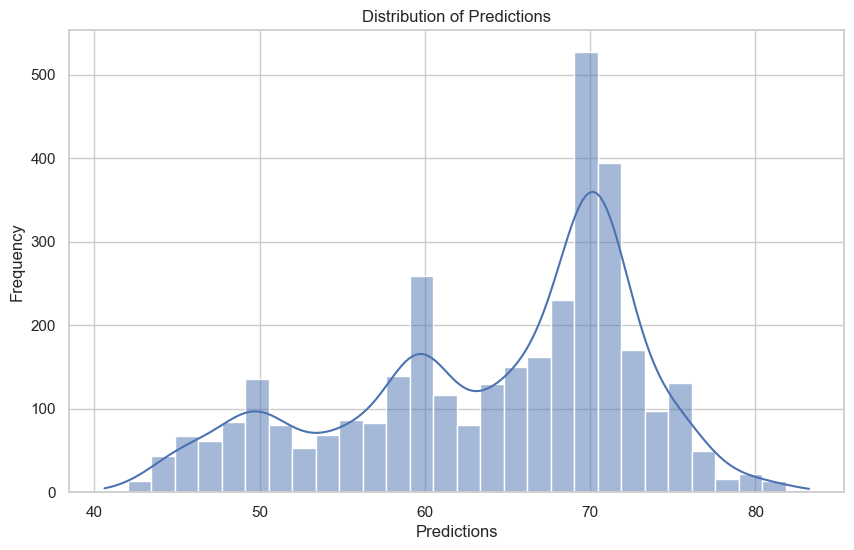

In [6]:
# plot the distribution of the predictions

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution of Predictions')
plt.xlabel('Predictions')
plt.ylabel('Frequency')


# Plotting history of Training

[WARN] Missing CSV log: ../checkpoints\tem\tem.csv


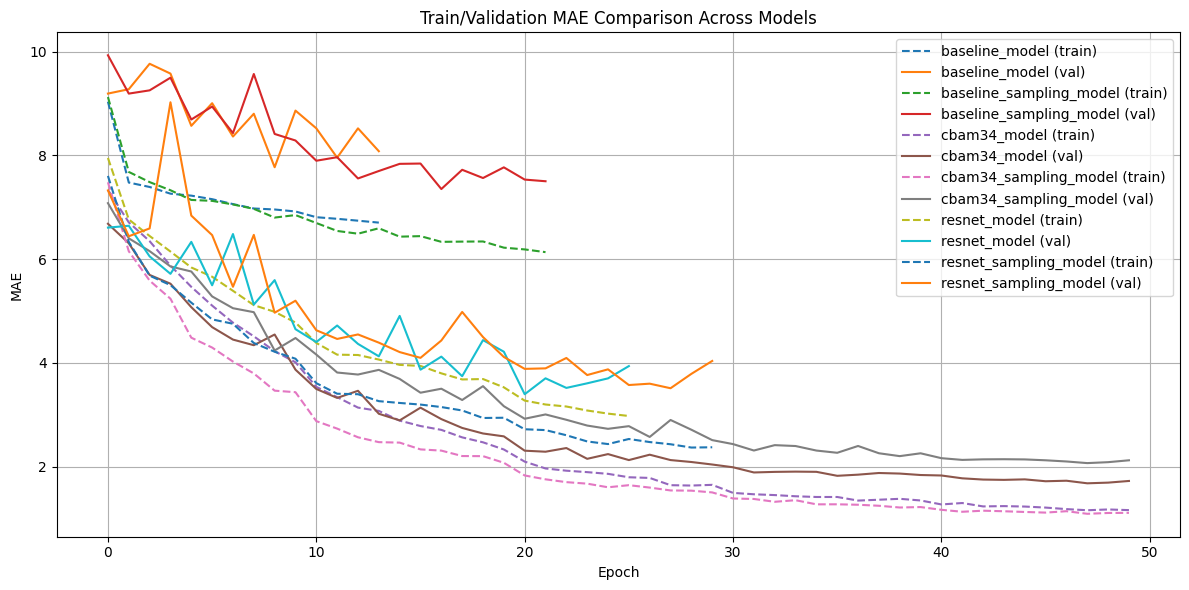

In [ ]:
base_path = "../checkpoints"
import matplotlib.pyplot as plt


model_dirs = [d for d in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, d))]
plt.figure(figsize=(12, 6))

for model_dir in model_dirs:
    csv_file = os.path.join(base_path, model_dir, f"{model_dir}.csv")
    if not os.path.isfile(csv_file):
        print(f"[WARN] Missing CSV log: {csv_file}")
        continue

    try:
        df = pd.read_csv(csv_file)
        if 'val_mae' in df.columns and 'train_mae' in df.columns:
            plt.plot(df['train_mae'], linestyle='--', label=f"{model_dir} (train)")
            plt.plot(df['val_mae'], label=f"{model_dir} (val)")
        elif 'val_mae' in df.columns:
            plt.plot(df['val_mae'], label=f"{model_dir} (val)")
            print(f"[WARN] 'train_mae' column missing in {csv_file}")
        else:
            print(f"[WARN] 'val_mae' column missing in {csv_file}")
    except Exception as e:
        print(f"[ERROR] Failed to read {csv_file}: {e}")

plt.title("Train/Validation MAE Comparison Across Models")
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()